# Introduction to Machine Learning

**Author:** Elen Tesfai  
**GitHub Repository:** [Elen's GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)


# Import Libraries
In this section, we will import the necessary libraries for data analysis and visualization.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Part 1 - Chart a Straight Line
## Celsius vs Fahrenheit Data
This section shows the relationship between Celsius and Fahrenheit using the equation:

\[ F = \frac{9}{5}C + 32 \]

Where:
- \( m = \frac{9}{5} \) is the slope (rise over run).
- \( b = 32 \) is the y-intercept (the point where the line crosses the y-axis).

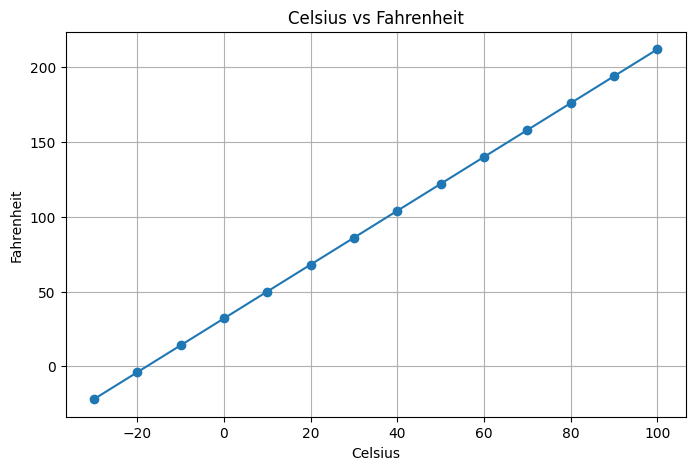

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define Celsius values (you can adjust the range)
celsius = pd.Series(range(-30, 101, 10))  # From -30 to 100 in steps of 10

# Calculate Fahrenheit using the equation F = (9/5)*C + 32
fahrenheit = (9/5) * celsius + 32

# Create a DataFrame for easy plotting
temp_df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})

# Plot the Celsius vs Fahrenheit
plt.figure(figsize=(8, 5))
plt.plot(temp_df['Celsius'], temp_df['Fahrenheit'], marker='o')

# Set labels and title
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')

# Show the plot
plt.grid(True)
plt.show()

# Part 2 - Prediction
### Section 1 - Data Acquisition

In [5]:
import pandas as pd

# Load the data
nyc_df = pd.read_csv(r'C:\Users\su_te\Documents\datafun-07-ml\examples\ch10\ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [7]:
# View the first and last few rows of the dataset
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [21]:
# Load the data (Make sure to have the correct path)
import pandas as pd

nyc_df = pd.read_csv(r'C:\Users\su_te\Documents\datafun-07-ml\examples\ch10\ave_hi_nyc_jan_1895-2018.csv')

# View the first few rows of the dataset
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


In [22]:
# Rename columns for clarity
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc_df.head(3))  # Check the first three rows

     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9


In [23]:
# Check the column type
print(nyc_df['Date'].dtype)  # Should output: int64

int64


In [25]:
# Convert Date column to integer if it’s not
nyc_df['Date'] = nyc_df['Date'].astype(int)

In [26]:
# Divide by 100 to truncate the last two digits
nyc_df['Date'] = nyc_df['Date'].floordiv(100)

In [27]:
# View the first three rows again
print(nyc_df.head(3))

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9


### section 4 - Descriptive Statistics
### 1. Set Display Precision and Get Descriptive Statistics:

In [28]:
import pandas as pd

# Set display precision for the DataFrame output
pd.set_option('display.precision', 2)

# Get basic descriptive statistics for the Temperature column
descriptive_stats = nyc_df['Temperature'].describe()
print(descriptive_stats)

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


### Section 5. - Build the Model
### 1. Import Required Libraries:

In [29]:
from scipy import stats
import numpy as np

### 2. Perform Linear Regression:

In [30]:
# Use linregress to calculate slope and intercept
linear_regression = stats.linregress(x=nyc_df['Date'], y=nyc_df['Temperature'])

# Get the slope and intercept
slope = linear_regression.slope
intercept = linear_regression.intercept

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


# Part 2 - Prediction
### Section 6 - Predict
### 1. Predict Average January Temperature for 2024 and 1890

In [32]:
# Predict average temperature in 2024
prediction_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print("Predicted average temperature in 2024:", prediction_2024)

# Predict average temperature in 1890
prediction_1890 = linear_regression.slope * 1890 + linear_regression.intercept
print("Predicted average temperature in 1890:", prediction_1890)

Predicted average temperature in 2024: 38.5922281667978
Predicted average temperature in 1890: 36.612865774980335


### Section 7. - Visualizations
### 1. Import Seaborn:

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Plot the Average High Temperatures and Regression Line:

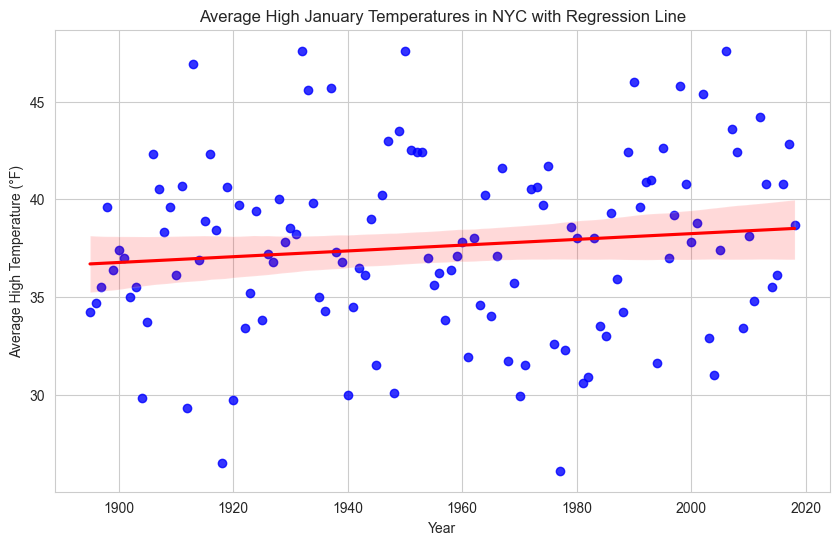

In [34]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create the regression plot
plt.figure(figsize=(10, 6))
axes = sns.regplot(x=nyc_df['Date'], y=nyc_df['Temperature'], marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Average High Temperature (°F)')
axes.set_title('Average High January Temperatures in NYC with Regression Line')

# Show the plot
plt.show()

### 3. Scaling the Y-Axis for Better Visualization:

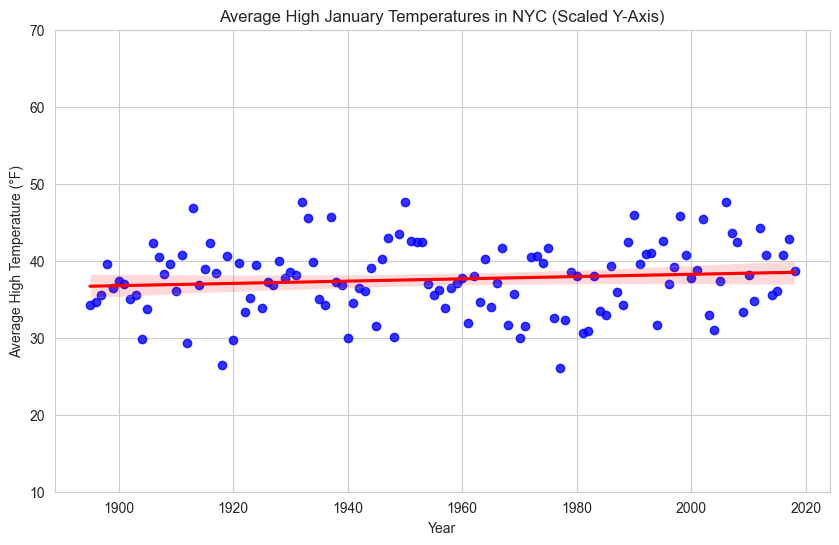

In [35]:
# Create the second regression plot with a scaled y-axis
plt.figure(figsize=(10, 6))
axes = sns.regplot(x=nyc_df['Date'], y=nyc_df['Temperature'], marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set limits for the y-axis
axes.set_ylim(10, 70)

# Set labels and title
axes.set_xlabel('Year')
axes.set_ylabel('Average High Temperature (°F)')
axes.set_title('Average High January Temperatures in NYC (Scaled Y-Axis)')

# Show the second plot
plt.show()

# Explanation
- First Plot: Shows the average high January temperatures over the years with a regression line.
 - Second Plot: The same data but with the y-axis limited to the range of 10°F to 70°F for better visual clarity.

# Part 3 - Prediction: Predicting Average High Temperature in NYC in January

### Section 1 - Build the Model

In [51]:
import pandas as pd
import os

# Define the file path
file_path = r'C:\Users\su_te\Documents\datafun-07-ml\your_file.csv'  # Update this to your actual file name

# Check if the file exists
if os.path.exists(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
else:
    print(f"Error: The file '{file_path}' does not exist. Please check the path and filename.")

# Display the first few rows of the DataFrame to verify the data
print("\nFirst few rows of the dataset:")
print(df.head())

Error: The file 'C:\Users\su_te\Documents\datafun-07-ml\your_file.csv' does not exist. Please check the path and filename.

First few rows of the dataset:
     Date  Temperature  Anomaly
0  189512         52.1     -1.8
1  189612         52.3     -1.6
2  189712         52.3     -1.6
3  189812         53.8     -0.1
4  189912         52.7     -1.2


In [52]:
# Section 2 - Data Inspection

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(df.tail())

# Display information about the DataFrame
print("\nDataFrame Info:")
print(df.info())

# Display basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

First few rows of the dataset:
     Date  Temperature  Anomaly
0  189512         52.1     -1.8
1  189612         52.3     -1.6
2  189712         52.3     -1.6
3  189812         53.8     -0.1
4  189912         52.7     -1.2

Last few rows of the dataset:
       Date  Temperature  Anomaly
118  201312         55.6      1.7
119  201412         54.4      0.5
120  201512         56.7      2.8
121  201612         57.2      3.3
122  201712         56.4      2.5

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         123 non-null    int64  
 1   Temperature  123 non-null    float64
 2   Anomaly      123 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB
None

Descriptive Statistics:
            Date  Temperature  Anomaly
count     123.00       123.00   123.00
mean   195612.00        53.86    -0.04
std      3565.

In [54]:
### Section 3 - Data Cleaning

# Convert 'Date' to a datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

# Rename columns for easier access
df.columns = ['date', 'temperature', 'anomaly']

# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Number of duplicate rows: 0

Missing values in each column:
date           0
temperature    0
anomaly        0
dtype: int64

Cleaned DataFrame:
        date  temperature  anomaly
0 1895-12-01         52.1     -1.8
1 1896-12-01         52.3     -1.6
2 1897-12-01         52.3     -1.6
3 1898-12-01         53.8     -0.1
4 1899-12-01         52.7     -1.2


In [55]:
### Section 4 - Descriptive Statistics

# Display basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check the range of temperatures and anomalies
temp_range = df['temperature'].min(), df['temperature'].max()
anomaly_range = df['anomaly'].min(), df['anomaly'].max()
print(f"\nTemperature Range: {temp_range}")
print(f"Anomaly Range: {anomaly_range}")


Descriptive Statistics:
                      date  temperature  anomaly
count                  123       123.00   123.00
mean   1956-11-30 16:00:00        53.86    -0.04
min    1895-12-01 00:00:00        49.20    -4.70
25%    1926-06-01 12:00:00        52.85    -1.05
50%    1956-12-01 00:00:00        53.80    -0.10
75%    1987-06-01 12:00:00        54.70     0.80
max    2017-12-01 00:00:00        57.70     3.80
std                    NaN         1.65     1.65

Temperature Range: (np.float64(49.2), np.float64(57.7))
Anomaly Range: (np.float64(-4.7), np.float64(3.8))


In [56]:
### Section 5 - Build the Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data for modeling
df['year'] = df['date'].dt.year  # Extract year for modeling
X = df[['year']]  # Feature variable
y = df['temperature']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of each dataset
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

Training set shape: (98, 1), (98,)
Testing set shape: (25, 1), (25,)


LinearRegression()

In [57]:
### Section 6 - Test the Model

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared value: {r2:.4f}")

Mean Squared Error: 1.1511
R-squared value: 0.3313


In [58]:
### Section 7 - Predict

# Create a new DataFrame for the year 2024
new_data = pd.DataFrame({'year': [2024]})

# Use the model to predict the average high temperature in January for 2024
prediction = model.predict(new_data)

# Print the prediction result
print(f"Predicted Average High Temperature in January 2024: {prediction[0]:.2f}°F")

Predicted Average High Temperature in January 2024: 56.29°F


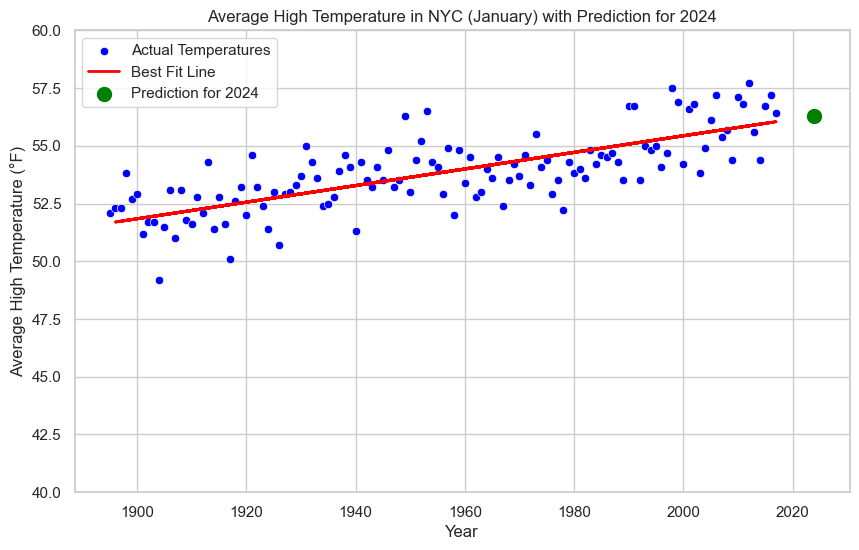

In [59]:
### Section 8 - Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot of the actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['year'], y=df['temperature'], label='Actual Temperatures', color='blue')

# Add the regression line for the training data
plt.plot(X_train, model.predict(X_train), color='red', label='Best Fit Line', linewidth=2)

# Mark the prediction for 2024
plt.scatter(2024, prediction[0], color='green', s=100, label='Prediction for 2024')

# Customize the plot
plt.title('Average High Temperature in NYC (January) with Prediction for 2024')
plt.xlabel('Year')
plt.ylabel('Average High Temperature (°F)')
plt.ylim(40, 60)  # Adjust as needed for better visualization
plt.legend()
plt.show()